# ANALYSIS_8 - Source transformation
## 8.1 - Data preprocessing
#### Logistic Regression Modeling Process

I decided to apply a **logistic regression model**. However, the raw dataset required some preprocessing, as it primarily consisted of categorical variables and time-based string fields (e.g., `event`, `os_version`, `event_time`, etc.), and lacked clearly defined numerical predictors and a binary target variable.

Therefore, it was necessary to first define a suitable input feature set and a binary target variable, essentially restructuring the data to support predictive modeling.

---

### 🧩 The following steps were taken

- **User-level aggregation**  
  The data was aggregated at the user level, allowing the model to learn on a per-user basis  
  *(i.e., one row = one user)*.

- **Engineered features**  
  - `event_count`: total number of events associated with a user  
  - `unique_days_active`: number of distinct days the user was active

- **Target variable**  
  - `converted` = 1 if the user reached the `trial_converted_event`  
  - Otherwise: `converted` = 0

---

### 📊 Final Modeling Data Structure

An input matrix `X` was created with numerical features (`event_count`, `unique_days_active`, etc.)  
and a corresponding target vector `y` (`converted`).

This data structure was now well-suited for training a **logistic regression model**.







In [1]:
import os
import pandas as pd
from pathlib import Path

# --- Elérési utak ---
input_file = r"C:\Users\user\Desktop\PROMETHEUS\2024_PROJECT - GITHUB\AAA_REFERENCIA_PREZIK\PREZI_10 - TELEPROMPTER\PY_10_PYClean_Source_V8\user_level_master.csv"
output_file = r"C:\Users\user\Desktop\PROMETHEUS\2024_PROJECT - GITHUB\AAA_REFERENCIA_PREZIK\PREZI_10 - TELEPROMPTER\PY_10_PYClean_Source_V11\convert_input.csv"

# --- Forrásfájl betöltése ---
df = pd.read_csv(input_file)

# --- Konvertált userek azonosítása ---
converted_users = df[df['event'] == 'trial_converted_event']['distinct_id'].unique()
df['converted'] = df['distinct_id'].isin(converted_users).astype(int)

# --- Aggregálás user szinten ---
user_df = df.groupby('distinct_id').agg({
    'event': 'count',
    'event_date': pd.Series.nunique,
    'converted': 'max'
}).reset_index()

# --- Átnevezés ---
user_df.rename(columns={
    'event': 'event_count',
    'event_date': 'unique_days_active'
}, inplace=True)

# --- Csak a szükséges három oszlop kiválasztása ---
final_df = user_df[['event_count', 'unique_days_active', 'converted']]

# --- Típusátalakítás ---
final_df['event_count'] = final_df['event_count'].astype(float)
final_df['unique_days_active'] = final_df['unique_days_active'].astype(float)
final_df['converted'] = final_df['converted'].astype(int)

# --- Kimeneti mappa létrehozása, ha nem létezik ---
Path(os.path.dirname(output_file)).mkdir(parents=True, exist_ok=True)

# --- Mentés CSV-be ---
final_df.to_csv(output_file, index=False)
print(f"Successfully created: {output_file}")


Successfully created: C:\Users\user\Desktop\PROMETHEUS\2024_PROJECT - GITHUB\AAA_REFERENCIA_PREZIK\PREZI_10 - TELEPROMPTER\PY_10_PYClean_Source_V11\convert_input.csv


C:\Users\user\AppData\Local\Temp\ipykernel_16648\3903137349.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['event_count'] = final_df['event_count'].astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_16648\3903137349.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['unique_days_active'] = final_df['unique_days_active'].astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_16648\3903137349.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

## 8.2 - The structure and content of the generated dataset do not yet fully align with the desired model framework, therefore further data fine tuning are required


## 8.3 - The final data structure are available. The necessary column structure is bordered in a green line (show in this Power BI platform).:
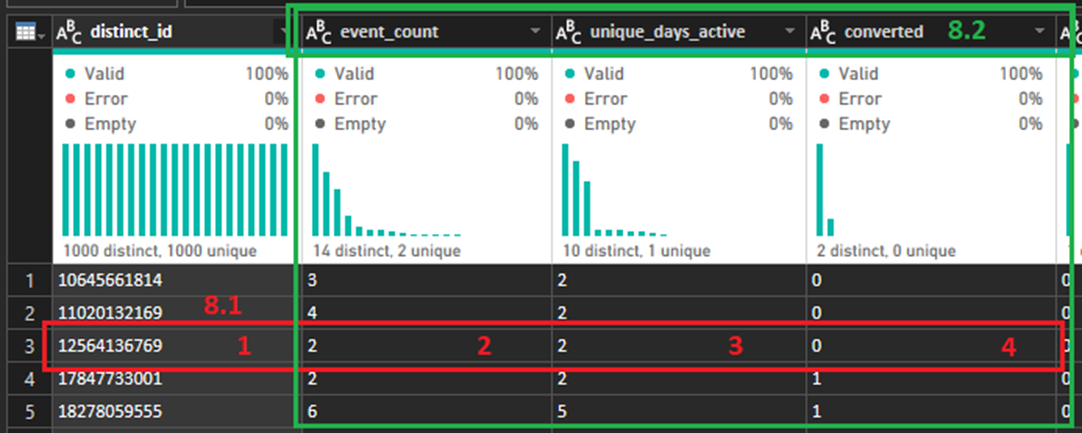

### 1 - distinct_id column is, removed from this data structure.
### 2,3,4 - number of columns are available for this LOG-REG modell